<a href="https://colab.research.google.com/github/vutl/AIO-Exercises/blob/feature%2FLinear-Regression-Exercises/Module4/Linear_Regression_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y

In [4]:
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X [2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


In [5]:
import random

def initialize_params():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr * dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr * dl_db

def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return w1, w2, w3, b, losses

In [14]:
y = predict(x1=1, x2 =1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

l = compute_loss(y_hat=1, y=0.5)
print(l)

g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

after_wi = update_weight_wi(wi = 1.0, dl_dwi = -0.5, lr = 1e-5)
print(after_wi)

after_b = update_weight_b(b =0.5, dl_db = -1.0, lr = 1e-5)
print(after_b)

1.0
0.25
-1.0
-3.0
1.000005
0.50001


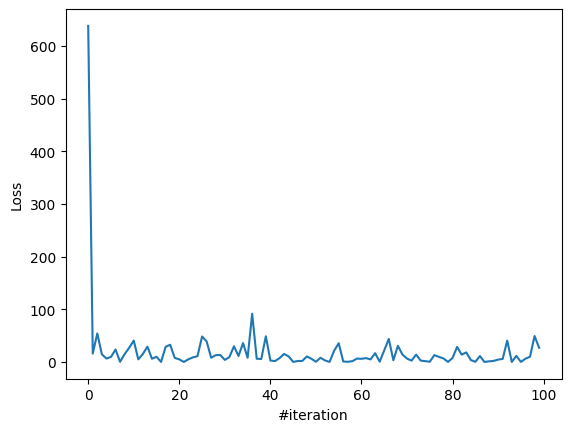

In [15]:
import matplotlib.pyplot as plt

X, y = prepare_data('advertising.csv')

# Huấn luyện mô hình và lấy lịch sử loss
w1, w2, w3, b, losses = implement_linear_regression(X, y)

# Vẽ đồ thị Loss cho 100 iterations đầu tiên
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [16]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405939681923443 0.15917245873126185 0.017560682994617906


In [17]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data('advertising.csv')
(w1, w2,w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(  tv,radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176441948179223


In [20]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            loss = compute_loss_mae(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return w1, w2, w3, b, losses

l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


In [21]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y) ** 2

def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [22]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5, loss_type='mse'):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            if loss_type == 'mse':
                loss = compute_loss_mse(y_hat, y)
            else:  # Use MAE loss if specified
                loss = compute_loss_mae(y_hat, y)

            loss_total += loss

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Cập nhật tham số sau khi tính toán trên tất cả các sample
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

0.0671161164005077 0.15736204415400742 0.02972919736305122


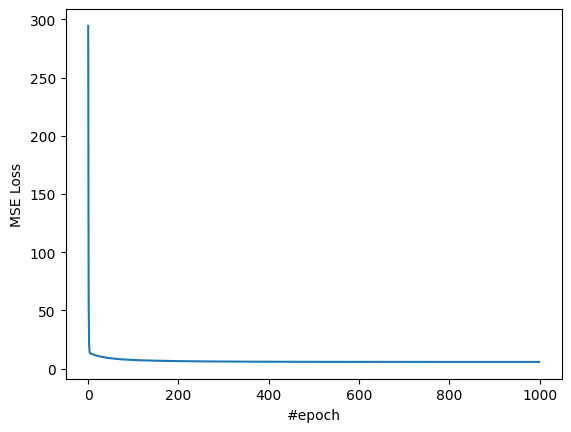

In [23]:
import matplotlib.pyplot as plt

# Giả sử bạn đã chuẩn bị dữ liệu X và y từ file 'advertising.csv'
X, y = prepare_data('advertising.csv')

# Huấn luyện với MSE và lấy lịch sử loss
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5, loss_type='mse')

# In giá trị của các weights w1, w2, w3
print(w1, w2, w3)

# Vẽ đồ thị MSE Loss qua các epochs
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

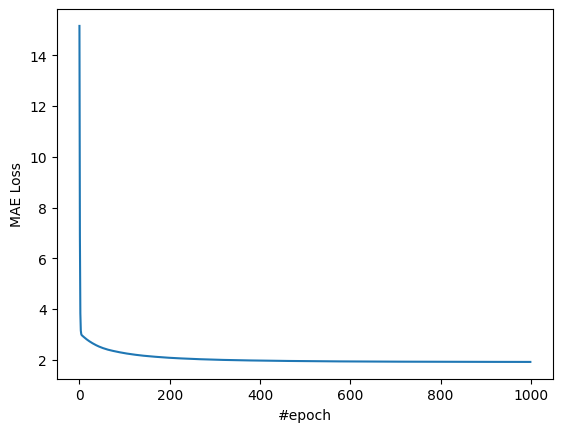

In [24]:
# Huấn luyện với MAE và lấy lịch sử loss
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5, loss_type='mae')

# Vẽ đồ thị MAE Loss qua các epochs
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [25]:
import numpy as np

def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # Xây dựng danh sách feature: [1, TV, Radio, Newspaper]
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

In [26]:
import random

def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    return [bias, w1, w2, w3]

In [27]:
def predict(X_features, weights):
    # Dự đoán y = x0*b + x1*w1 + x2*w2 + x3*w3
    y_hat = sum([x * w for x, w in zip(X_features, weights)])
    return y_hat

In [28]:
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

In [29]:
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [(y_hat - y) * x for x in X_features]
    return dl_dweights

In [30]:
def update_weight(weights, dl_dweights, lr):
    return [w - lr * dw for w, dw in zip(weights, dl_dweights)]

In [31]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]

            # Dự đoán y_hat
            y_hat = predict(features_i, weights)

            # Tính toán Loss
            loss = compute_loss(y_hat, y)

            # Tính Gradient cho weights
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Cập nhật các tham số
            weights = update_weight(weights, dl_dweights, lr)

            # Lưu trữ Loss
            losses.append(loss)

    return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


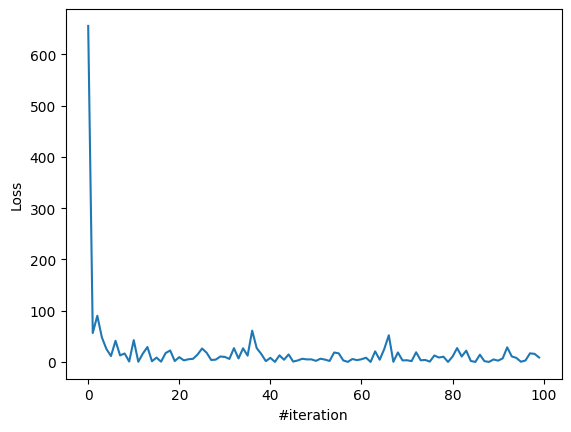

In [32]:
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu từ file 'advertising.csv'
X, y = prepare_data('advertising.csv')

# Huấn luyện mô hình và lấy danh sách weights và losses
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

# Vẽ đồ thị Loss cho 100 iteration đầu tiên
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [36]:
print(L[9999])  # Giá trị của loss tại iteration thứ 9999

4.1021181225459


epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


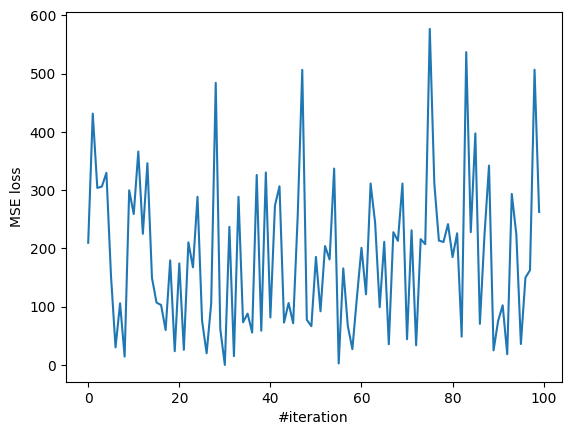

In [40]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Lấy dữ liệu TV, Radio, Newspaper và Sales
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    # Scale data (only for features)
    # Remember to scale input features in inference, therefore, we need to save max, min values
    (tv_data, radio_data, newspaper_data), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3) = min_max_scaling(tv_data, radio_data, newspaper_data)

    # Xây dựng danh sách feature: [1, TV, Radio, Newspaper]
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

def min_max_scaling(data1, data2, data3):
    max_data_1 = max(data1)
    max_data_2 = max(data2)
    max_data_3 = max(data3)

    min_data_1 = min(data1)
    min_data_2 = min(data2)
    min_data_3 = min(data3)

    # Implement your code to normalize data1, data2, data3 using min and max values
    data1 = [(x - min_data_1) / (max_data_1 - min_data_1) for x in data1]
    data2 = [(x - min_data_2) / (max_data_2 - min_data_2) for x in data2]
    data3 = [(x - min_data_3) / (max_data_3 - min_data_3) for x in data3]

    return (data1, data2, data3), (max_data_1, max_data_2, max_data_3, min_data_1, min_data_2, min_data_3)

# Huấn luyện mô hình với dữ liệu đã chuẩn hóa
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y)

# Vẽ đồ thị kết quả Loss
plt.plot(L[-100:])
plt.xlabel("#iteration")
plt.ylabel("MSE loss")
plt.show()